In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import files
uploaded = files.upload()


Saving sample_sales_data.csv to sample_sales_data.csv


In [4]:
df = pd.read_csv('sample_sales_data.csv')
print(df)


          Date  Sales
0   2020-01-01  21490
1   2020-02-01  19585
2   2020-03-01  21943
3   2020-04-01  24569
4   2020-05-01  19297
5   2020-06-01  19297
6   2020-07-01  24737
7   2020-08-01  22302
8   2020-09-01  18591
9   2020-10-01  21627
10  2020-11-01  18609
11  2020-12-01  18602
12  2021-01-01  20725
13  2021-02-01  14260
14  2021-03-01  14825
15  2021-04-01  18313
16  2021-05-01  16961
17  2021-06-01  20942
18  2021-07-01  17275
19  2021-08-01  15763
20  2021-09-01  24396
21  2021-10-01  19322
22  2021-11-01  20202
23  2021-12-01  15725
24  2022-01-01  18366
25  2022-02-01  20332
26  2022-03-01  16547
27  2022-04-01  21127
28  2022-05-01  18198
29  2022-06-01  19124
30  2022-07-01  18194
31  2022-08-01  25556
32  2022-09-01  19959
33  2022-10-01  16826
34  2022-11-01  22467
35  2022-12-01  16337
36  2023-01-01  20626
37  2023-02-01  14120
38  2023-03-01  16015
39  2023-04-01  20590
40  2023-05-01  22215
41  2023-06-01  20514
42  2023-07-01  19653
43  2023-08-01  19096
44  2023-0

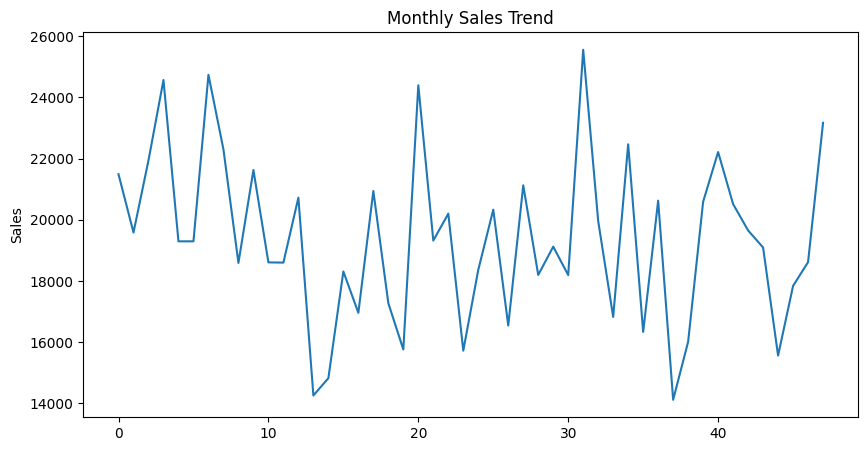

In [5]:

df['Sales'].plot(figsize=(10, 5), title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

Lets check weather our sales data is unstationary or not(have any trends or patterns or not)....if yes we have to make it sationary....

In [6]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test
result = adfuller(df['Sales'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -6.384079368964715
p-value: 2.186003800751455e-08


Our p-value is 0.00000002186 which is very small than 0.05 meaning our data is stationary....

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Remove NA for differenced data
df.dropna(inplace=True)

# Fit ARIMA model (p,d,q) → try different combos
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -446.330
Date:                Sun, 20 Apr 2025   AIC                            898.660
Time:                        07:41:16   BIC                            904.210
Sample:                             0   HQIC                           900.748
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2375      0.147      1.620      0.105      -0.050       0.525
ma.L1         -0.9962      0.232     -4.291      0.000      -1.451      -0.541
sigma2      9.715e+06   2.45e-08   3.96e+14      0.0

48    19948.641004
49    19183.415090
50    19001.693965
51    18958.539955
52    18948.292007
53    18945.858388
Name: predicted_mean, dtype: float64


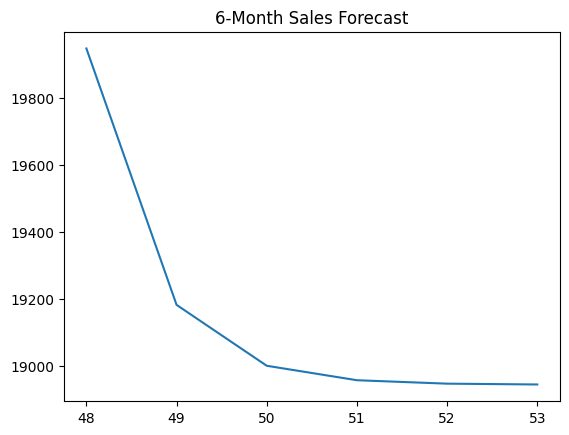

In [8]:
# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Print and plot
print(forecast)
forecast.plot(title="6-Month Sales Forecast")
plt.show()
